# Effective Rank Deficit Simulation

In [ ]:
import numpy as np
from itertools import product
from scipy.linalg import svdvals, svd
import matplotlib.pyplot as plt
# ROW_SPACE = np.arange(1,20)
ROW_SPACE = np.arange(1,21)
COL_SPACE = np.arange(1,21)
tol_space = np.linspace(0.01,0.2,21)
rows = []
cols = []
ranks_all = []
ranks_pos = []
tols = []

for i, ROW_NUM, COL_NUM, tol in product(range(1000), ROW_SPACE, COL_SPACE, tol_space):
    rows.append(ROW_NUM)
    cols.append(COL_NUM)
    tols.append(tol)
    matrix = np.random.normal(0,1,size=(ROW_NUM, COL_NUM))
    svdvalues = svdvals(matrix)
    # svdvalues/=np.sum(svdvalues)
    rank_all = np.sum(svdvalues>tol)
    svadvalues_pos = svdvals(np.abs(matrix))
    rank_pos = np.sum(svadvalues_pos>tol)
    ranks_all.append(rank_all)
    ranks_pos.append(rank_pos)

In [25]:
import pandas as pd
dat = pd.DataFrame({
    "row": rows,
    "col": cols,
    "tol": tols,
    "rank_all": rank_all,
    "rank_pos": rank_pos
})

In [26]:
dat.to_csv("rank_sim.csv")

In [15]:
import seaborn as sns

<Axes: xlabel='row', ylabel='rank_all'>

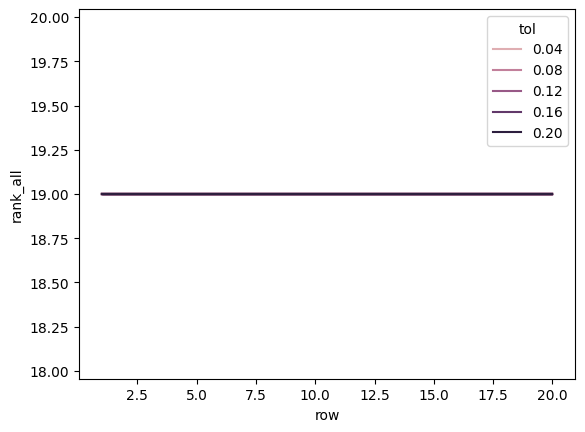

In [27]:
sns.lineplot(data = dat[dat.col == 15], x="row", y="rank_all", hue="tol")

<Axes: xlabel='row', ylabel='rank_pos'>

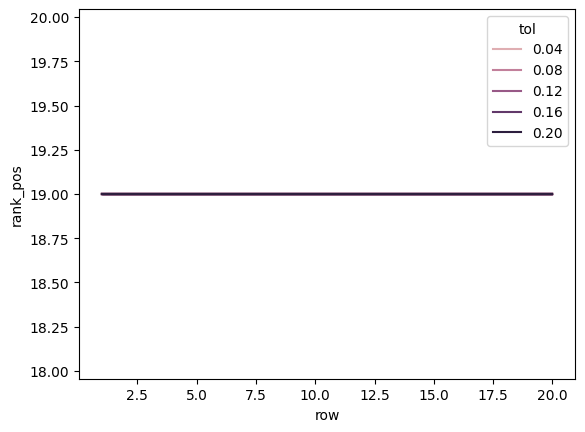

In [28]:
sns.lineplot(data = dat[dat.col == 15], x="row", y="rank_pos", hue="tol")

(6.0, 10.0)

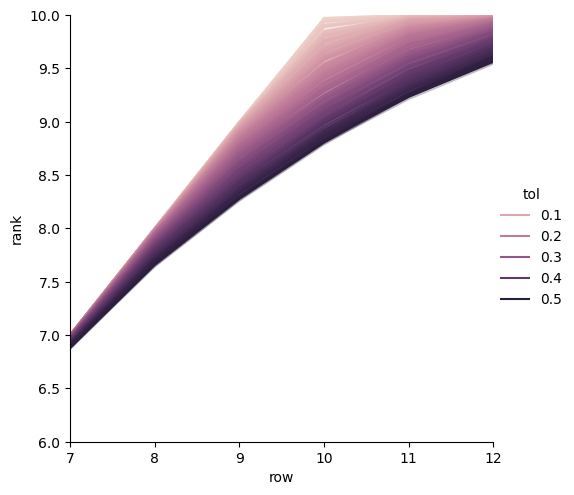

In [40]:
sns.relplot(data = dat[dat.col == 10], x="row", y="rank", hue="tol", kind = "line")
plt.xlim(7,12)
plt.ylim(6,10)

In [23]:
dat[np.logical_and(dat.col == 30, dat.row == 27)].groupby(["row","tol"])["rank_all"].value_counts()

row  tol     rank_all
27   0.0100  32          1000
     0.0195  32          1000
     0.0290  32          1000
     0.0385  32          1000
     0.0480  32          1000
     0.0575  32          1000
     0.0670  32          1000
     0.0765  32          1000
     0.0860  32          1000
     0.0955  32          1000
     0.1050  32          1000
     0.1145  32          1000
     0.1240  32          1000
     0.1335  32          1000
     0.1430  32          1000
     0.1525  32          1000
     0.1620  32          1000
     0.1715  32          1000
     0.1810  32          1000
     0.1905  32          1000
     0.2000  32          1000
Name: count, dtype: int64

# Clustered Connection Matrix

In [37]:
_conn = np.array([
    [1.1,1.0,0.9,0,0,0,0,0,0,0,0,0],
    [0.9,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,2.1,2.2,2.3,0,0,0,0,0,0],
    [0,0,0,2,2,2,0,0,0,0,0,0],
    [0,0,0,1.9,2,1.8,0,0,0,0,0,0],
    [0,0,0,0,0,0,4,5,6,0,0,0],
    [0,0,0,0,0,0,6,5,4,0,0,0],
    [0,0,0,0,0,0,5,5,5,0,0,0],
    [0,0,0,0,0,0,0,0,0,9,9,9]
])

In [38]:
_svdvals = svdvals(_conn)

(array([4., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2.]),
 array([6.19003881e-16, 7.79422863e-01, 1.55884573e+00, 2.33826859e+00,
        3.11769145e+00, 3.89711432e+00, 4.67653718e+00, 5.45596004e+00,
        6.23538291e+00, 7.01480577e+00, 7.79422863e+00, 8.57365150e+00,
        9.35307436e+00, 1.01324972e+01, 1.09119201e+01, 1.16913430e+01,
        1.24707658e+01, 1.32501887e+01, 1.40296115e+01, 1.48090344e+01,
        1.55884573e+01]),
 <BarContainer object of 20 artists>)

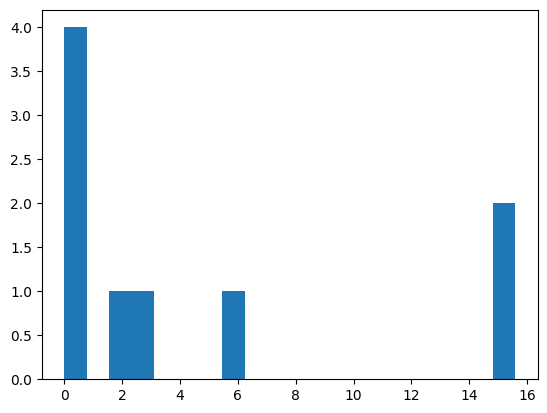

In [39]:
plt.hist(_svdvals, bins = 20)

In [42]:
_svd = svd(_conn)

In [45]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, normalized_stress='auto')
X_transformed = embedding.fit_transform(_svd[0])
X_transformed.shape

/Users/waragonp/Documents/GitHub/repgeo/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


(9, 2)

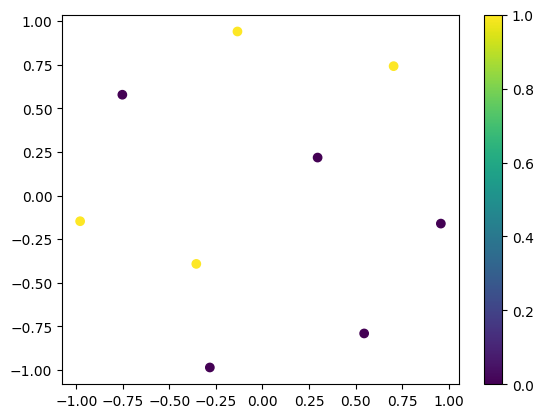

In [52]:
plt.scatter(X_transformed[:,0], X_transformed[:,1],c = (_svdvals)/np.sum(_svdvals)> 0.05)
plt.colorbar()

(array([3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([1.49186592e-17, 3.75698584e-03, 7.51397167e-03, 1.12709575e-02,
        1.50279433e-02, 1.87849292e-02, 2.25419150e-02, 2.62989008e-02,
        3.00558867e-02, 3.38128725e-02, 3.75698584e-02, 4.13268442e-02,
        4.50838300e-02, 4.88408159e-02, 5.25978017e-02, 5.63547875e-02,
        6.01117734e-02, 6.38687592e-02, 6.76257450e-02, 7.13827309e-02,
        7.51397167e-02, 7.88967025e-02, 8.26536884e-02, 8.64106742e-02,
        9.01676601e-02, 9.39246459e-02, 9.76816317e-02, 1.01438618e-01,
        1.05195603e-01, 1.08952589e-01, 1.1270

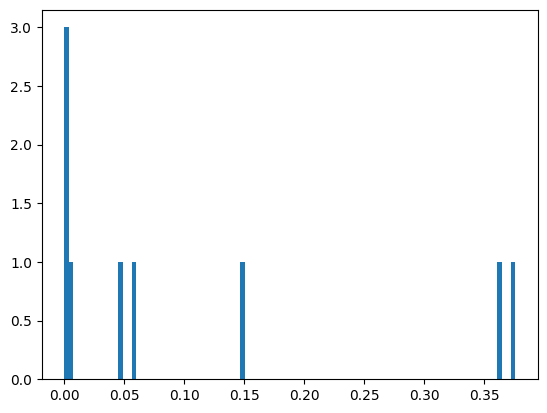

In [54]:
plt.hist((_svdvals)/np.sum(_svdvals), bins = 100)